In [20]:
import ast
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from IPython.core.display import HTML
import os

In [21]:
df = pd.read_csv("data2.csv")

df['Score'][df['Score'].str.contains('/')] = .64
df['Score'] = 100* df['Score'].astype(float)
df['Voted'] = df['Voted'].fillna('-')
df.loc[ df['Voted'] == '-', 'Voted'] = 0
df.loc[ df['Voted'] == "['6.4/10']", 'Voted'] = 0

df['Voted'] = 100* df['Voted'].astype(float)

actors =set()
for item in df['Actors']:
    items =  ast.literal_eval(item)

    for actor in items:
        if len(actor) > 5:
            actors.add(actor.strip())
actors= list(actors)
def actorHandler(x):
    x = ast.literal_eval(x)
    x = [ y.strip() for y in x]
    return ','.join(x)
df['Actors'] = df['Actors'].apply(actorHandler)

In [22]:
def path_to_image_html(path): ##by ARIAN GHASEMI
    return '<img src="'+ path + '" width="60" >'
HTML(df[0:10].to_html(escape=False,formatters=dict(Image=path_to_image_html)))

,Name,Actors,Score,About,Genre,Crew,Image,Voted,Type
0,عطش,"بهرام رادان,فریبرز عرب نیا,شهرام حقیقت دوست,شبنم قلی خانی,ساغر عزیزی,طیب شرافتی",88.0,NaN,"['اکشن', 'ماجراجویی']","[' محمدحسین فرح بخش', ' عبدالله علیخانی', ' فرج الله حیدری ', ' پیمان معادی', ' کیوان جهانشاهی']",,76100.0,فیلم
1,یکی از میان همه,"سروش صحت,رامین راستاد,آزاده صمدی,کیانوش گرامی,حمیدرضا پگاه",69.0,نیلوفر و نرگس بدون اطلاع همسرانشان مجبور به سفری ناخواسته می شوند و همسرانشان در تعقیب آنها...,"['اکشن', 'هیجان انگیز']",[' ابراهیم شیبانی'],,28000.0,فیلم
2,جاده جنایت,"لعیا زنگنه,کاوه آرمیده,حشمت الله آرمیده",76.0,وقتی کتایون نگرانی و اضطراب بیش از حد شوهرش – کامبیز – را می بیند، وی را نزد یک روانپزشک می فرستد و خود برای بازی در یک فیلم عازم ویلایشان در شمال می شود. در شمال کتایون که مجبور است به دلیل وضعیت نامناسب هوا در ویلا بماند...,"['اکشن', 'هیجان انگیز']","[' جهانبخش ایمانی', ' ذبیح الله رحمانی', ' آرزو محمدنژاد', ' جهانبخش ایمانی']",,53000.0,فیلم
3,ساوالان,"مجید مظفری,محمد برسوزیان,فردوس کاویانی,خسرو دستگیر",90.0,روستای ساوالان هرسال توسط گروهی راهزن غارت می شود. اهالی روستا گروهی را برای کمک می طلبند جوانی به نام سلام به این گروه ملحق می شود. ولی گروهی که برای کمک آمده اند باعث اتفاقات دیگری می شوند.,"['اکشن', 'ماجراجویی']","[' یدالله صمدی', ' سیفعلی سیدکوثری نژاد', ' یدالله صمدی', ' فرهاد فخرالدینی', ' حسن قلی زاده']",,49300.0,فیلم
4,پوزه چرمی,"ندا مقصودی,وحید جباری",68.0,مردی برای رسیدن به اهدافش با پس انداز همسرش دست به خرید اره برقی می زند ...,"['فیلم تئاتر', 'خانوادگی']","[' محمدعلی زمانی', ' هلموت کراوزر', ' محمد مهدی صباغیان', ' رامین ارقند', ' نسیم ملکی', ' وحید صالحی', ' مسعود خرداد', ' وحید مشایخی']",,18200.0,فیلم
5,همکلاس,"علی قربان زاده,رامبد شکرآبی,حدیث فولادوند,پرستو صالحی,غلامعلی برجسته",77.0,NaN,"['خانوادگی', 'اجتماعی']","[' سعید خورشیدیان', ' محسن مسافرچی', ' سعید خورشیدیان', ' غلامعلی برجسته', ' بهرام سعیدی', ' حسین ملکی']",,35800.0,فیلم
6,شکلاتی,"شبنم مقدمی,ناصر هاشمی,محمدرضا هدایتی,ارژنگ امیرفضلی,فرزین محدث,علیرضا مسعودی",90.0,فیلم شکلاتی درباره این فیلم درباره کارخانه شکلات سازی است که به پارسای ۱۳ ساله ارث می رسد و پارسا با کمک دوستان خود سعی در اداره آن دارد.,"['خانوادگی', 'کمدی']","[' سهیل موفق', ' کریم خودسیانی', ' ایرج محمدی']",,1833000.0,فیلم
7,دلشوره,"مجید مشیری,امیرمحمد زند,کوروش سلیمانی,معصومه میرحسینی,ملیکا طباخی",73.0,NaN,"['خانوادگی', 'اجتماعی']","[' مهرداد پوراحمد', ' کیومرث پوراحمد', ' کیومرث پوراحمد', ' ناصر کاووسی']",,11400.0,فیلم
8,فریاد در شب,"ایرج نوذری,حدیث فولادوند,نازنین کریمی,محمود مقامی,زهره حمیدی",69.0,دختری به نام هما که در فراز و نشیب زندگی اثیر حوادثی می شود که زندگی او را از سیر طبیعی خود خارج کرده و او را دچار کابوس می کند. همزمان او در گیر و دار قتل هایی قرار می گیرد که پلیس به دنبال پیداکردن سرنخی برای سرمنشأ این قتل هاست.,"['خانوادگی', 'اجتماعی']","[' کریم رجبی', ' هایده رزم آور', ' مسعود عسگری']",,22400.0,فیلم
9,افسانه های جاویدان - حکایت های مثنوی معنوی,,82.0,"پادشاه قدرتمند و توانایی, روزی برای شكار با درباریان خود به صحرا رفت, در راه كنیزك زیبایی دید و عاشق او شد. پول فراوان داد و دخترك را از اربابش خرید, پس از مدتی كه با كنیزك بود. كنیزك بیمار شد و شاه بسیار غمناك گردید.",['تاریخی | مذهبی'],"[' رسول نجفیان', ' محمود کشاورز', ' شامل تافته']",,23700.0,فیلم


In [23]:
df['Type'].value_counts()

فیلم       1327
سریال        82
انیمیشن       1
Name: Type, dtype: int64

In [24]:
df_type = df[['Type','Score']].groupby('Type', as_index = False).mean()
df_type

,Type,Score
0,انیمیشن,68.000000
1,سریال,85.134146
2,فیلم,79.899020


In [25]:
df.describe()

,Score,Voted
count,1410.000000,1.410000e+03
mean,80.195035,2.115202e+06
std,10.612584,1.301777e+07
min,20.000000,0.000000e+00
25%,74.000000,3.590000e+04
50%,82.000000,1.347000e+05
75%,89.000000,5.320000e+05
max,99.000000,2.126292e+08


In [26]:
df['Genre'].value_counts()

['خانوادگی', 'اجتماعی']       697
['کمدی', 'خانوادگی']          157
['اکشن', 'هیجان انگیز']        66
['خانوادگی', 'کمدی']           64
['خانوادگی', 'عاشقانه']        52
['خانوادگی', 'کودک']           49
['اکشن', 'جنگی']               43
['اکشن', 'پلیسی معمایی']       42
['فیلم تئاتر']                 37
['تاریخی | مذهبی']             35
['عاشقانه', 'خانوادگی']        32
['کمدی', 'اکشن']               18
['کنسرت']                      17
['کمدی', 'عاشقانه']            17
['فیلم تئاتر', 'خانوادگی']     16
['اکشن', 'ماجراجویی']          16
[]                             13
['فیلم تئاتر', 'کمدی']         10
['وحشت', 'هیجان انگیز']         6
['کمدی']                        5
['خانوادگی']                    5
['عاشقانه', 'کمدی']             2
['اکشن']                        2
['وحشت', 'علمی تخیلی']          2
['اکشن', 'ورزشی']               1
['انیمیشن', 'موزیکال']          1
['فیلم تئاتر', 'عاشقانه']       1
['اکشن', 'گانگستری']            1
['علمی تخیلی']                  1
['عاشقانه']   

In [27]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

unique = to_1D(df['Genre']).value_counts()
unique.to_frame(name = 'تعداد')

,تعداد
',5380
ا,4258
ی,2612
ن,1573
,1545
[,1410
],1410
د,1394
",",1293
گ,1189


Text(0.5, 1.0, 'Genre')

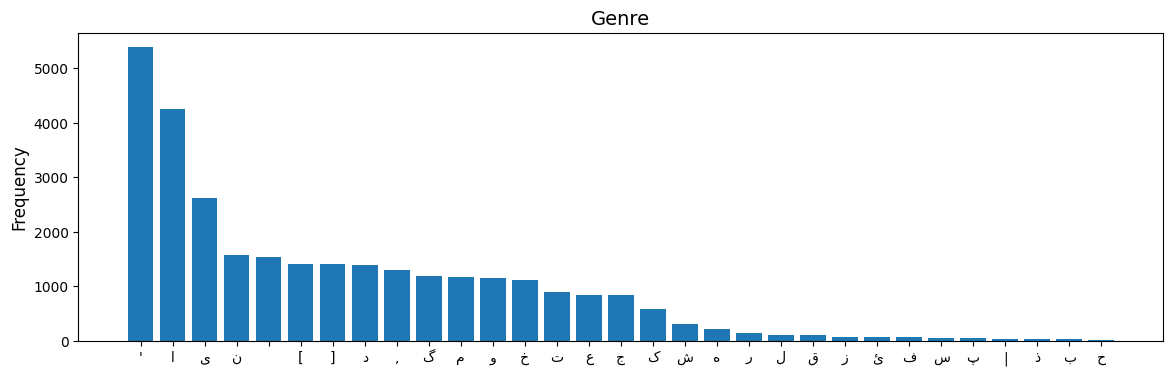

In [28]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df["Genre"]).value_counts().index,
       to_1D(df["Genre"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Genre", size = 14)

In [29]:
df_mean_genre = df.groupby('Genre').Score.mean().to_frame().sort_values(by = 'Score', ascending = False)
df_mean_genre

,Score
Genre,
['اکشن'],88.500000
"['کمدی', 'عاشقانه']",88.058824
"['اکشن', 'جنگی']",87.395349
['عاشقانه'],86.000000
"['اکشن', 'ماجراجویی']",85.562500
"['اکشن', 'ورزشی']",85.000000
['علمی تخیلی'],85.000000
"['اکشن', 'هیجان انگیز']",84.000000
['تاریخی | مذهبی'],83.771429


In [30]:
px.scatter(df, x='Voted' , y='Score', hover_name='Name'
           , labels='Name', log_x='True', color='Type')

In [31]:
serialScore=df.groupby('Type')['Score'].mean().loc['سریال']
FilmScore = df.groupby('Type')['Score'].mean().loc['فیلم']
serial_to_film_ratio = serialScore / FilmScore
#adjusted the scores which biased in Serial series
df.loc[ df['Type'] == 'سریال', 'Score'] =df.loc[ df['Type'] == 'سریال', 'Score'] /serial_to_film_ratio

In [32]:
actors_dict = {}
for actor in actors:
    df_selected  = df[ df['Actors'].str.contains(actor)]
    actors_dict[actor] = [ df_selected.shape[0] , df_selected['Score'].mean() , df_selected['Voted'].mean()]

In [33]:
df_actors = pd.DataFrame(actors_dict).T
df_actors.reset_index(inplace=True)
df_actors.columns = ['name' ,'filmNumbers' , 'avgScore' , 'avgVoted']
df_actors['avgScoretimesFilmnumber'] = df_actors['filmNumbers'] * df_actors['avgScore']
df_actors.sort_values('avgScore', ascending=False, inplace=True)
df_actors.reset_index(inplace=True, drop=True)

In [34]:
fig = px.bar(df_actors.loc[df_actors['filmNumbers']>10],  x='name' , y='avgScore',title='برترین ها' , color='filmNumbers')
fig.show()

In [35]:
df_actors

,name,filmNumbers,avgScore,avgVoted,avgScoretimesFilmnumber
0,پرویز شیخ طادی,1.0,99.0,35600.0,99.0
1,مازیار سیدی,1.0,97.0,11201900.0,97.0
2,الهه علی یاری,1.0,97.0,590700.0,97.0
3,الهام علی یاری,1.0,97.0,590700.0,97.0
4,سلامه فیضی,1.0,97.0,6400.0,97.0
...,...,...,...,...,...
2730,سارا سقایی,1.0,42.0,1100.0,42.0
2731,حبیب شکوری,1.0,42.0,1100.0,42.0
2732,سعید درویشی,1.0,42.0,1100.0,42.0
2733,یاسر جعفری,1.0,37.0,1592000.0,37.0


In [36]:
print('برترین ها:')
df_bestactors = df_actors.loc[df_actors['filmNumbers']>10].copy()
for i in range(20):
    print('*' , df_bestactors.iloc[i, 0] , 'با شرکت در' , int(df_bestactors.iloc[i, 1]) , 'فیلم با میانگین امتیاز ' , round(df_bestactors.iloc[i, 2],2),)

برترین ها:
* حمید جبلی با شرکت در 11 فیلم با میانگین امتیاز  89.52
* علی شادمان با شرکت در 11 فیلم با میانگین امتیاز  89.39
* مریلا زارعی با شرکت در 26 فیلم با میانگین امتیاز  89.06
* حسام نواب صفوی با شرکت در 12 فیلم با میانگین امتیاز  87.87
* جواد عزتی با شرکت در 30 فیلم با میانگین امتیاز  87.7
* السا فیروز آذر با شرکت در 11 فیلم با میانگین امتیاز  87.68
* مهران غفوریان با شرکت در 21 فیلم با میانگین امتیاز  87.13
* شهره لرستانی با شرکت در 18 فیلم با میانگین امتیاز  87.07
* حمیده خیرآبادی با شرکت در 16 فیلم با میانگین امتیاز  86.75
* مهدی پاکدل با شرکت در 14 فیلم با میانگین امتیاز  86.68
* گوهر خیراندیش با شرکت در 37 فیلم با میانگین امتیاز  86.61
* محمدرضا شریفی نیا با شرکت در 33 فیلم با میانگین امتیاز  86.55
* لیندا کیانی با شرکت در 14 فیلم با میانگین امتیاز  86.54
* احمد مهرانفر با شرکت در 13 فیلم با میانگین امتیاز  86.51
* پرویز پرستویی با شرکت در 27 فیلم با میانگین امتیاز  86.38
* مهدی هاشمی با شرکت در 12 فیلم با میانگین امتیاز  86.33
* فیروز با شرکت در 17 فیلم با میانگین امتیاز  

In [38]:
px.scatter(df_actors , x='filmNumbers' , y='avgScore' , hover_name='name')

In [39]:
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}

    # Loop through all the tags
    for i, item in enumerate(unique_items):

        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [40]:
unique1 = to_1D(df['Actors']).value_counts()
Actors_bool = boolean_df(df['Actors'], unique1.keys())
Actors_int = Actors_bool.astype(int)
Actors_freq_mat = np.dot(Actors_int.T, Actors_int)
Actors_freq = pd.DataFrame(Actors_freq_mat, columns = unique1.keys(), index = unique1.keys())
Actors_freq

,ی,ا,,ر,",",م,ن,د,ه,و,...,چ,ظ,ث,ئ,ذ,ؤ,ء,‏,أ,ى
ی,1319,1317,1319,1310,1317,1294,1291,1278,1230,1216,...,200,198,190,117,66,28,5,3,1,1
ا,1317,1318,1318,1310,1317,1294,1291,1277,1229,1215,...,201,198,190,117,66,28,5,3,1,1
,1319,1318,1320,1311,1318,1295,1292,1279,1231,1217,...,201,198,190,117,66,28,5,3,1,1
ر,1310,1310,1311,1311,1311,1287,1285,1272,1225,1210,...,199,198,189,117,66,28,5,3,1,1
",",1317,1317,1318,1311,1318,1293,1292,1278,1230,1216,...,201,198,190,117,66,28,5,3,1,1
م,1294,1294,1295,1287,1293,1295,1270,1258,1208,1196,...,199,197,188,117,65,28,5,3,1,1
ن,1291,1291,1292,1285,1292,1270,1292,1254,1207,1195,...,197,197,190,117,66,28,5,3,1,1
د,1278,1277,1279,1272,1278,1258,1254,1279,1198,1183,...,199,190,182,117,65,26,5,3,1,0
ه,1230,1229,1231,1225,1230,1208,1207,1198,1231,1138,...,197,192,168,115,65,28,5,3,1,1
و,1216,1215,1217,1210,1216,1196,1195,1183,1138,1217,...,189,191,184,109,60,28,4,2,1,1
